In [13]:
# Upload data and extract the contents
from zipfile import ZipFile

file_name = "data/dogs-vs-cats-redux-kernels-edition/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall("data/working")
  print('done')

done


In [14]:
data_dir_list = os.listdir('data/working/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("data/working/train"))
file_count = len(files)
print(file_count)

25000


In [15]:
original_dataset_dir = 'data/working/train'
base_dir = 'data/working/cats_and_dogs_small'
os.mkdir(base_dir) #make base directory

In [16]:
#Create directory paths

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [17]:
import shutil

# def createFName(org_data_dir, train_data_class_dir, rangeInput1, rangeInput2):
#     "This funciton is to create the source and desitnation paths and copy the data."
#     fnames = ['cat.{}.jpg'.format(i) for i in range(rangeInput1,rangeInput2)]
#     for fname in fnames:
#         src = os.path.join(org_data_dir, fname)
#         dst = os.path.join(train_data_class_dir, fname)
#         #print(src,dst)
#         shutil.copyfile(src, dst)

# createFName(original_dataset_dir,train_cats_dir,0,1000)
# createFName(original_dataset_dir,validation_cats_dir,1000,1500)
# createFName(original_dataset_dir,test_cats_dir,1500,2000)

# createFName(original_dataset_dir,train_dogs_dir,0,1000)
# createFName(original_dataset_dir,validation_dogs_dir,1000,1500)
# createFName(original_dataset_dir,test_dogs_dir,1500,2000)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [20]:
from keras import layers
from keras import models

#Created sequential models using Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [21]:
# from tensorflow import keras
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)

C:\Users\moham\AppData\Local\Temp\ipykernel_29504\3018969907.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 66s 647ms/step - loss: 0.7207 - acc: 0.5105 - val_loss: 0.6868 - val_acc: 0.5200
Epoch 2/20
100/100 [==============================] - 46s 457ms/step - loss: 0.6744 - acc: 0.5775 - val_loss: 0.6483 - val_acc: 0.6600
Epoch 3/20
100/100 [==============================] - 45s 451ms/step - loss: 0.6299 - acc: 0.6535 - val_loss: 0.6234 - val_acc: 0.6350
Epoch 4/20
100/100 [==============================] - 49s 493ms/step - loss: 0.5924 - acc: 0.6900 - val_loss: 0.6165 - val_acc: 0.6750
Epoch 5/20
100/100 [==============================] - 45s 451ms/step - loss: 0.5494 - acc: 0.7235 - val_loss: 0.5996 - val_acc: 0.6600
Epoch 6/20
100/100 [==============================] - 47s 475ms/step - loss: 0.5139 - acc: 0.7455 - val_loss: 0.5201 - val_acc: 0.7200
Epoch 7/20
100/100 [==============================] - 41s 406ms/step - loss: 0.4653 - acc: 0.7805 - val_loss: 0.5505 - val_acc: 0.7600
Epoch 8/20
100/100 [==============================] - 4

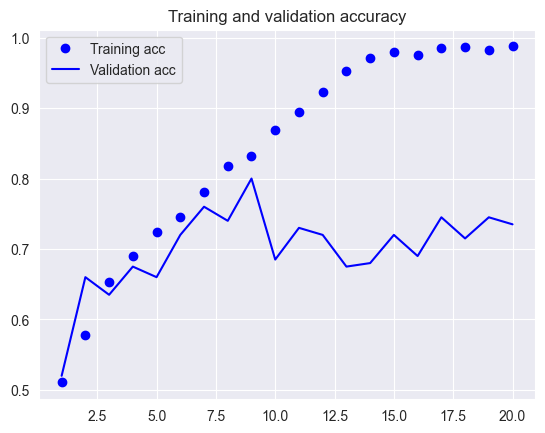

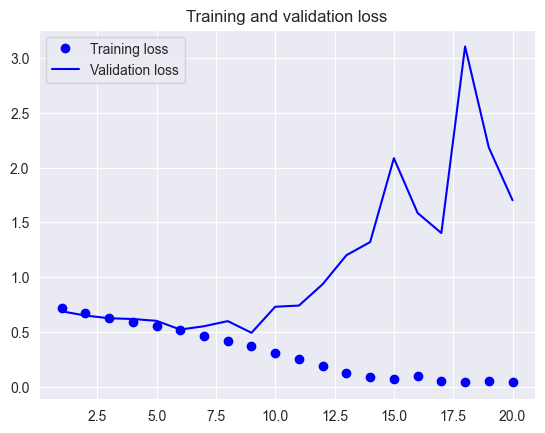

In [24]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

CNN with dropout

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20


C:\Users\moham\AppData\Local\Temp\ipykernel_29504\1391841176.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 31s 306ms/step - loss: 0.7228 - acc: 0.4890 - val_loss: 0.6926 - val_acc: 0.5150
Epoch 2/20
100/100 [==============================] - 75s 757ms/step - loss: 0.6955 - acc: 0.5040 - val_loss: 0.6910 - val_acc: 0.5050
Epoch 3/20
100/100 [==============================] - 71s 712ms/step - loss: 0.6918 - acc: 0.5410 - val_loss: 0.6808 - val_acc: 0.5700
Epoch 4/20
100/100 [==============================] - 41s 407ms/step - loss: 0.6719 - acc: 0.5885 - val_loss: 0.6368 - val_acc: 0.6000
Epoch 5/20
100/100 [==============================] - 37s 365ms/step - loss: 0.6547 - acc: 0.6155 - val_loss: 0.6425 - val_acc: 0.6000
Epoch 6/20
100/100 [==============================] - 33s 333ms/step - loss: 0.6421 - acc: 0.6435 - val_loss: 0.6308 - val_acc: 0.6100
Epoch 7/20
100/100 [==============================] - 35s 346ms/step - loss: 0.6419 - acc: 0.6275 - val_loss: 0.5871 - val_acc: 0.7050
Epoch 8/20
100/100 [==============================] - 34s 336ms/st

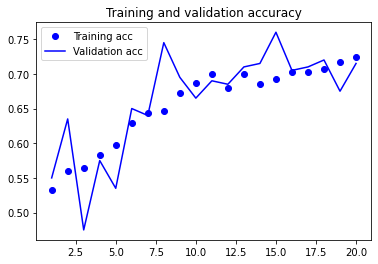

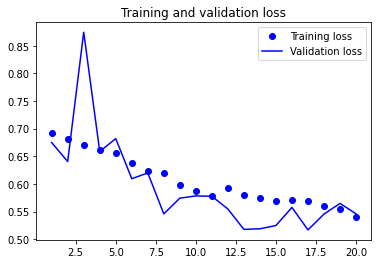

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()